In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [136]:
data=pd.read_csv("Test/Test_100ws.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,condition,cond_id,length,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,...,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy,hst_mean,hst_variance,hst_skewness,hst_spectral_entropy
0,p010487,3598196_0004,atrial_fibrillation,0,15150,0.687467,0.012579,-0.084067,5.345920,0.765058,...,1.371776,5.880067,0.528088,0.004535,1.106997,5.868318,0.024570,0.002149,9.144840,6.692622
1,p010487,3229491_0002,atrial_fibrillation,0,4083,0.732894,0.006321,-0.048997,3.832142,1.169088,...,-0.394238,3.896979,0.974385,0.018543,-0.471791,2.881037,0.141659,0.005319,0.622679,2.048789
2,p000571,3745136_0001,myocardial_infarction,2,23903,0.532273,0.008014,-0.177844,6.256509,0.519728,...,-0.145732,7.065381,0.570196,0.004322,-0.926832,5.773350,0.146632,0.005525,0.925897,6.409963
3,p000571,3745136_0002,myocardial_infarction,2,10992,0.470510,0.015445,0.056521,5.060402,0.419690,...,0.549816,5.959068,0.542149,0.013972,-1.470746,4.268255,0.178649,0.013374,0.711898,4.333920
4,p015963,3645793_0002,atrial_fibrillation,0,939,0.899458,0.001107,-0.185131,2.508365,1.489345,...,-0.181628,2.474683,0.584477,0.002562,0.069249,2.383423,0.109470,0.000517,0.398857,2.580247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,p002280,3117261_0001,congestive_heartfailure,1,139419,0.403653,0.023406,-0.771525,5.230529,0.382000,...,-0.046512,6.060310,NaN,NaN,NaN,NaN,0.019135,0.000068,4.305492,9.363343
865,p002280,3117261_0002,congestive_heartfailure,1,744,0.562526,0.001480,0.994590,1.936754,0.607687,...,-0.649942,2.283495,0.411249,0.002322,0.063398,1.868363,0.018969,0.000128,0.892137,1.825333
866,p002280,3869118_0001,congestive_heartfailure,1,104600,0.407277,0.018199,0.612575,3.296518,0.429414,...,1.353649,8.305012,0.548328,0.009191,1.252023,7.115143,0.039355,0.001994,4.245785,7.500177
867,p002280,3869118_0002,congestive_heartfailure,1,61078,0.416109,0.020682,0.395070,3.713808,0.434553,...,0.104312,7.744961,0.489102,0.015933,-0.172911,5.237698,0.057872,0.004703,2.637580,6.273184


<h2>Clean dataset<h2>

In [137]:
#Extract metrics
data = data[["cond_id","hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

data = data.dropna()
#data = data[ data["hurst"] >= 0.1]
data

,cond_id,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0,0.024570,0.002149,0.687467,0.012579,-0.084067,5.345920,0.765058,0.057268,0.466584,...,-0.448430,6.338076,0.242591,0.005455,1.371776,5.880067,0.528088,0.004535,1.106997,5.868318
1,0,0.141659,0.005319,0.732894,0.006321,-0.048997,3.832142,1.169088,0.189573,0.727071,...,-0.452447,3.742067,0.638226,0.025388,-0.394238,3.896979,0.974385,0.018543,-0.471791,2.881037
2,2,0.146632,0.005525,0.532273,0.008014,-0.177844,6.256509,0.519728,0.025218,0.970259,...,2.741488,7.253260,0.337414,0.006420,-0.145732,7.065381,0.570196,0.004322,-0.926832,5.773350
3,2,0.178649,0.013374,0.470510,0.015445,0.056521,5.060402,0.419690,0.033557,1.087329,...,3.227262,6.114702,0.295277,0.009053,0.549816,5.959068,0.542149,0.013972,-1.470746,4.268255
4,0,0.109470,0.000517,0.899458,0.001107,-0.185131,2.508365,1.489345,0.014806,0.056928,...,0.425483,2.582066,0.257103,0.001379,-0.181628,2.474683,0.584477,0.002562,0.069249,2.383423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1,0.060438,0.004224,0.541597,0.008792,-0.738587,7.990240,0.595218,0.022304,-0.433493,...,0.962385,9.553123,0.250585,0.008464,0.699231,8.194354,0.533467,0.012949,-0.613358,6.321847
865,1,0.018969,0.000128,0.562526,0.001480,0.994590,1.936754,0.607687,0.009199,0.401184,...,-0.043537,2.276681,0.218257,0.000666,-0.649942,2.283495,0.411249,0.002322,0.063398,1.868363
866,1,0.039355,0.001994,0.407277,0.018199,0.612575,3.296518,0.429414,0.020299,0.330811,...,2.195665,6.742022,0.275050,0.006244,1.353649,8.305012,0.548328,0.009191,1.252023,7.115143
867,1,0.057872,0.004703,0.416109,0.020682,0.395070,3.713808,0.434553,0.028139,0.271990,...,1.821796,7.460137,0.243179,0.004911,0.104312,7.744961,0.489102,0.015933,-0.172911,5.237698


<h2>Define train set and targets<h2>

In [138]:
#Group by pathology
a_f=data[data["cond_id"] ==0]
c_c=data[data["cond_id"] ==1]
m_i=data[data["cond_id"] ==2]

#Extract important metrics
atrial_f = a_f[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
congestive_h = c_c[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
myocardial_i = m_i[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

#Create target array for training
targets=a_f['cond_id'].tolist()+m_i['cond_id'].tolist()+c_c['cond_id'].tolist()

#Create input array for training
X=pd.concat([atrial_f,myocardial_i,congestive_h],ignore_index=True)
X
print(len(a_f))
print(len(c_c))
print(len(m_i))
print(len(a_f)+len(c_c)+len(m_i))

232
227
199
658


<h2>Histograms<h2>

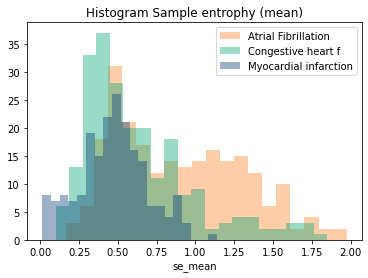

In [201]:
se_af=a_f["se_mean"]
se_cc=c_c["se_mean"]
se_mi=m_i["se_mean"]


sn.distplot(a=se_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

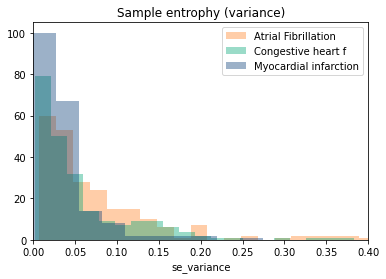

In [202]:
sev_af=a_f["se_variance"]
sev_cc=c_c["se_variance"]
sev_mi=m_i["se_variance"]


sn.distplot(a=sev_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

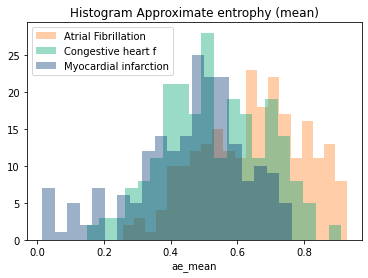

In [206]:
aem_af=a_f["ae_mean"]
aem_cc=c_c["ae_mean"]
aem_mi=m_i["ae_mean"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

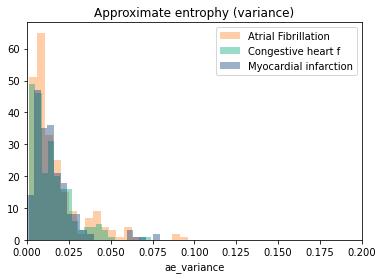

In [208]:
aev_af=a_f["ae_variance"]
aev_cc=c_c["ae_variance"]
aev_mi=m_i["ae_variance"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

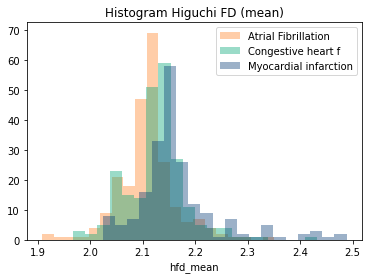

In [209]:
hfd_af=a_f["hfd_mean"]
hfd_cc=c_c["hfd_mean"]
hfd_mi=m_i["hfd_mean"]


sn.distplot(a=hfd_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Higuchi FD (mean)")
plt.legend()

(0.0, 0.015)

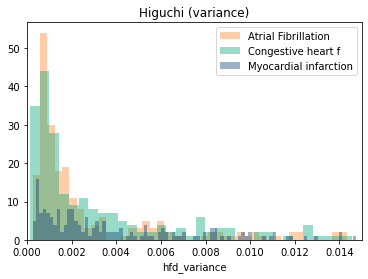

In [210]:
hfdv_af=a_f["hfd_variance"]
hfdv_cc=c_c["hfd_variance"]
hfdv_mi=m_i["hfd_variance"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

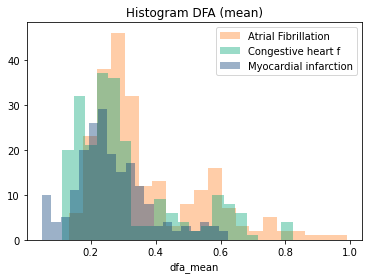

In [212]:
dfa_af=a_f["dfa_mean"]
dfa_cc=c_c["dfa_mean"]
dfa_mi=m_i["dfa_mean"]


sn.distplot(a=dfa_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram DFA (mean)")
plt.legend()

(0.0, 0.04)

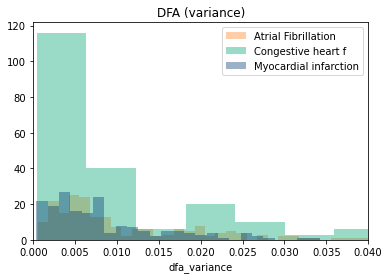

In [215]:
dfav_af=a_f["dfa_variance"]
dfav_cc=c_c["dfa_variance"]
dfav_mi=m_i["dfa_variance"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

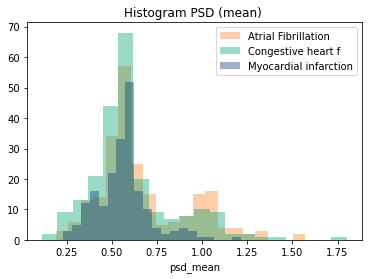

In [216]:
psd_af=a_f["psd_mean"]
psd_cc=c_c["psd_mean"]
psd_mi=m_i["psd_mean"]


sn.distplot(a=psd_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram PSD (mean) ")
plt.legend()

(0.0, 0.2)

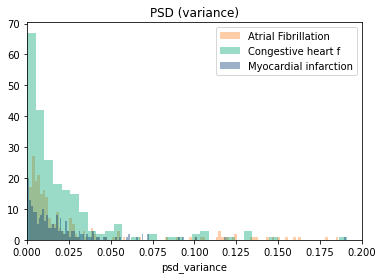

In [217]:
psdv_af=a_f["psd_variance"]
psdv_cc=c_c["psd_variance"]
psdv_mi=m_i["psd_variance"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Scatter plots<h2>

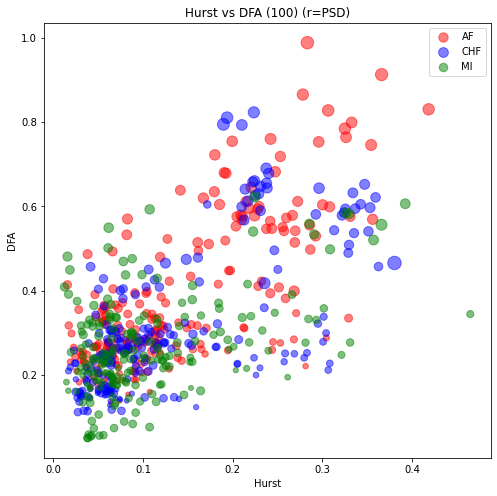

In [231]:
np_pop = np.array(atrial_f["psd_mean"])*100
np_pop1 = np.array(congestive_h["psd_mean"])*100
np_pop2 = np.array(myocardial_i["psd_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["dfa_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["dfa_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["dfa_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs DFA (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("DFA")
plt.savefig(('HurstvsDFA (100).png'))
plt.show()

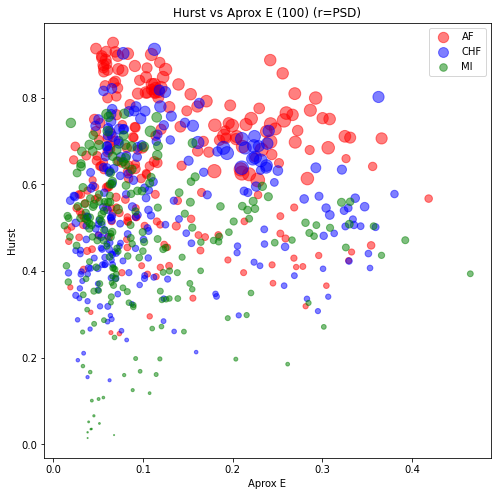

In [224]:
np_pop = np.array(atrial_f["se_mean"])*100
np_pop1 = np.array(congestive_h["se_mean"])*100
np_pop2 = np.array(myocardial_i["se_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["ae_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["ae_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["ae_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs Aprox E (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Aprox E")
plt.ylabel("Hurst")
plt.show()

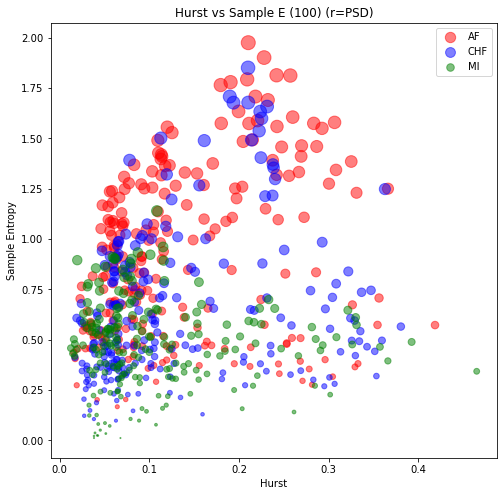

In [226]:
np_pop = np.array(atrial_f["se_mean"])*100
np_pop1 = np.array(congestive_h["se_mean"])*100
np_pop2 = np.array(myocardial_i["se_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["se_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["se_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["se_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs Sample E (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("Sample Entropy")
plt.show()

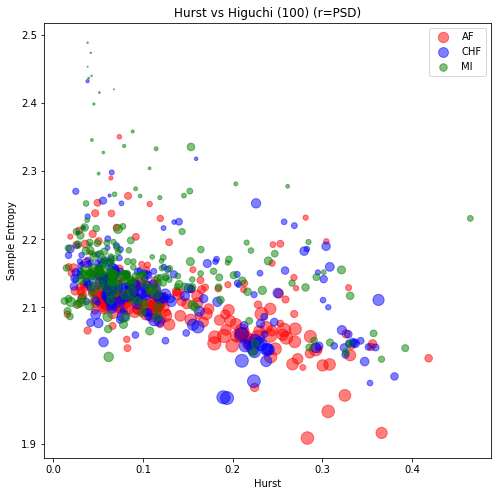

In [225]:
np_pop = np.array(atrial_f["se_mean"])*100
np_pop1 = np.array(congestive_h["se_mean"])*100
np_pop2 = np.array(myocardial_i["se_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["hfd_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["hfd_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["hfd_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs Higuchi (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("Sample Entropy")
plt.show()

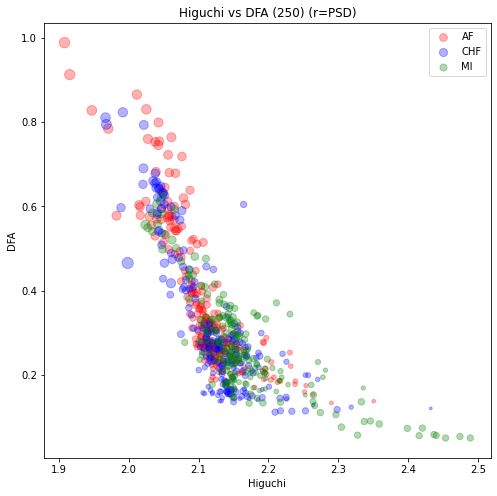

In [228]:
np_pop = np.array(atrial_f["psd_mean"])*70
np_pop1 = np.array(congestive_h["psd_mean"])*70
np_pop2 = np.array(myocardial_i["psd_mean"])*70

fig = plt.figure(figsize=(8,8))

a=plt.scatter(atrial_f["hfd_mean"],atrial_f["dfa_mean"],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["hfd_mean"],congestive_h["dfa_mean"],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["hfd_mean"],myocardial_i["dfa_mean"],color='green',alpha=0.3,s=np_pop2)

plt.title("Higuchi vs DFA (250) (r=PSD)")
plt.axis
plt.xlabel("Higuchi")
plt.ylabel("DFA")
plt.legend((a,b,c),("AF","CHF","MI"))

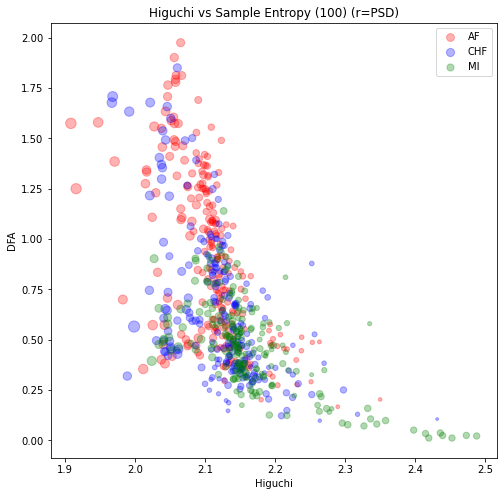

In [229]:
np_pop = np.array(atrial_f["psd_mean"])*70
np_pop1 = np.array(congestive_h["psd_mean"])*70
np_pop2 = np.array(myocardial_i["psd_mean"])*70

fig = plt.figure(figsize=(8,8))

a=plt.scatter(atrial_f["hfd_mean"],atrial_f["se_mean"],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["hfd_mean"],congestive_h["se_mean"],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["hfd_mean"],myocardial_i["se_mean"],color='green',alpha=0.3,s=np_pop2)

plt.title("Higuchi vs Sample Entropy (100) (r=PSD)")
plt.axis
plt.xlabel("Higuchi")
plt.ylabel("DFA")
plt.legend((a,b,c),("AF","CHF","MI"))

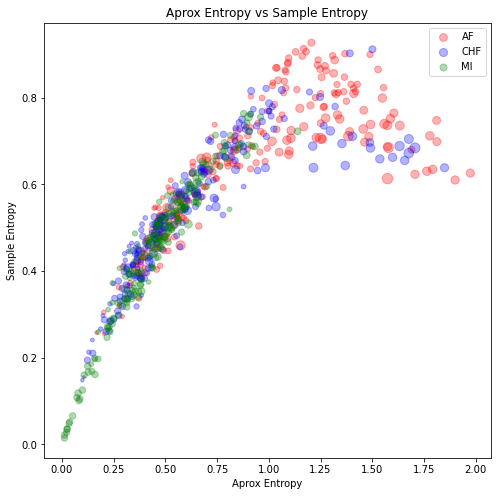

In [230]:
np_pop = np.array(atrial_f["psd_mean"])*70
np_pop1 = np.array(congestive_h["psd_mean"])*70
np_pop2 = np.array(myocardial_i["psd_mean"])*70

fig = plt.figure(figsize=(8,8))

a=plt.scatter(atrial_f["se_mean"],atrial_f["ae_mean"],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["se_mean"],congestive_h["ae_mean"],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["se_mean"],myocardial_i["ae_mean"],color='green',alpha=0.3,s=np_pop2)

plt.title("Aprox Entropy vs Sample Entropy")
plt.axis
plt.xlabel("Aprox Entropy")
plt.ylabel("Sample Entropy")
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Train datasets<h2>

In [139]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

526
526


<h2>Logistic regression <h2>

Accuracy:  0.5075757575757576


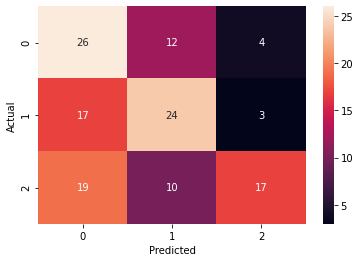

In [140]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>K nearest neightbors<h2>

In [141]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#Scale train set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.55


<526x526 sparse matrix of type '<class 'numpy.float64'>'
	with 1578 stored elements in Compressed Sparse Row format>

<h2>Gaussian Naive Bayes<h2>

In [142]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Function
gnb = GaussianNB()

#Training
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 132 points : 72
Accuracy :  0.4545454545454546


<h2>Bernoulli Naive Bayes<h2>

In [168]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli function
bnb = BernoulliNB()

#Training
y_pred = bnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 137 points : 74
Accuracy :  0.45985401459854014


<h2>Multi-layer Perceptron<h2>

0.46715328467153283


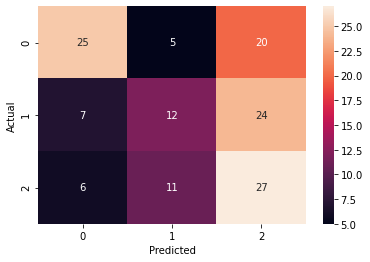

In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Scale training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#Neural Network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=20000)

#Training
clf.fit(X_train, y_train)
X_test = sc.fit_transform(X_test)

#Score
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

#Confussion matrix
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Random forest<h2>


Accuracy :  0.6590909090909091


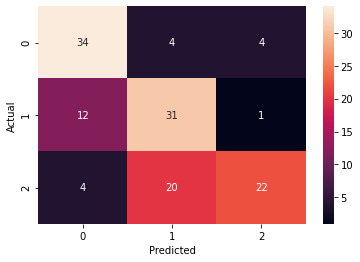

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Extra trees classifier<h2>

Accuracy :  0.6818181818181818


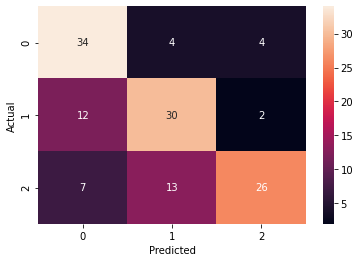

In [184]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Ada Boost<h2>

Accuracy :  0.6590909090909091


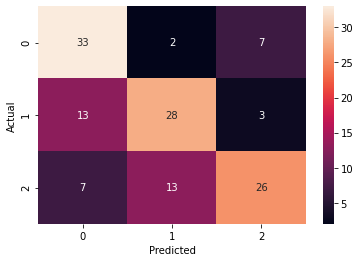

In [172]:
from sklearn.ensemble import AdaBoostClassifier

cassifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Voting Classifier<h2>

In [252]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5) 
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.62 (+/- 0.02) [Ensemble]


In [ ]:
import 